In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mglearn

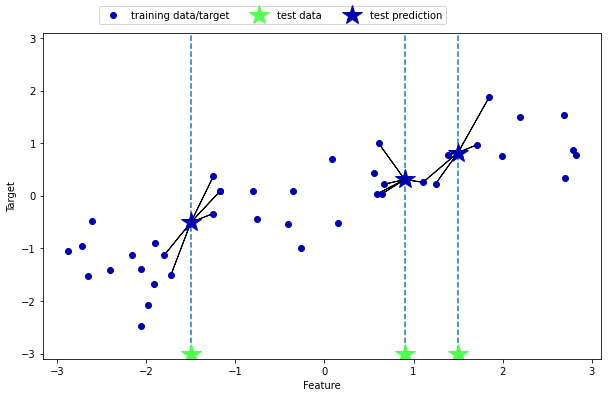

In [3]:
mglearn.plots.plot_knn_regression(n_neighbors=5)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

x,y = mglearn.datasets.make_wave(n_samples=40)

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=111)

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)


train_score =knn.score(x_train,y_train)
test_score = knn.score(x_test,y_test)

print(train_score, test_score)  # 과적합 => 모델을 단순화

0.8585617204962638 0.2453288040322017


In [6]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(x_train,y_train)


train_score =knn.score(x_train,y_train)
test_score = knn.score(x_test,y_test)

print(train_score, test_score)

0.7052388550839183 0.7865206873840339


In [9]:
test_score_list= []
train_score_list= []

for k in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)


    train_score =knn.score(x_train,y_train)
    test_score = knn.score(x_test,y_test)
    
    train_score_list.append(train_score)
    test_score_list.append(test_score)

    print('k :',k, train_score, test_score)

k : 1 1.0 0.05589727892197305
k : 2 0.8801081102074234 0.0701364693826011
k : 3 0.8585617204962638 0.2453288040322017
k : 4 0.8618038637526048 0.2875566296991019
k : 5 0.8624252951207979 0.4220214091337652
k : 6 0.8245828607125973 0.567108757160166
k : 7 0.7936441345783886 0.6697359894167373
k : 8 0.7599916240813328 0.7054623142847276
k : 9 0.7122211055302146 0.78769101934609
k : 10 0.7052388550839183 0.7865206873840339
k : 11 0.7000470614288212 0.8157262205538992
k : 12 0.6702506793446364 0.8444064308873191
k : 13 0.6401056956717159 0.7898611657442082
k : 14 0.6150999464847111 0.8095372764147899
k : 15 0.5816779708749786 0.8312220069036954
k : 16 0.5729557973741513 0.8073236483309518
k : 17 0.5504075198291991 0.8035560492337025
k : 18 0.5447163042601362 0.7684008355628881
k : 19 0.5335967419104735 0.7363374108692122
k : 20 0.511714390883725 0.7099070815282413
k : 21 0.47902139599550775 0.6666248186929179
k : 22 0.43164605038291437 0.6246597538311446
k : 23 0.36797779708712774 0.552234

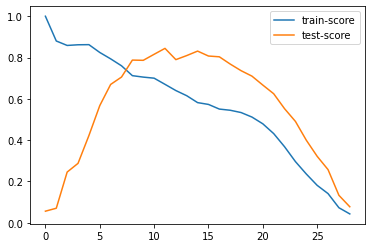

In [10]:
plt.plot(train_score_list, label= 'train-score')
plt.plot(test_score_list, label = 'test-score')
plt.legend()
plt.show()

In [11]:
 import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

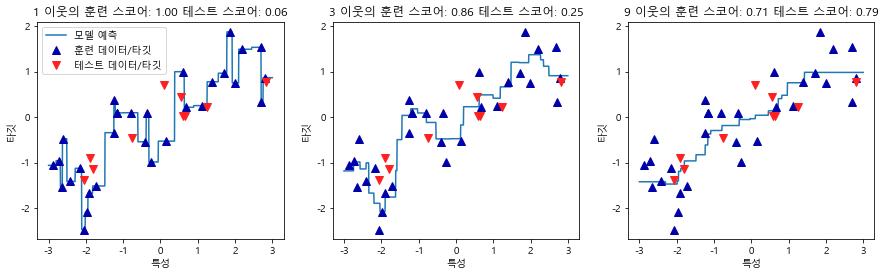

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3과 3 사이에 1,000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(x_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(x_train, y_train),
    reg.score(x_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], 
               loc="best")